<a href="https://colab.research.google.com/github/SyedHuzaifa007/PIAIC-Deep-Learning-Assignments/blob/main/Concrete_Strength_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing Modules
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import seaborn as sns

In [ ]:
# Loading Data
df = pd.read_csv("/content/drive/MyDrive/ML_Datasets/compresive_strength_concrete.csv")
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [ ]:
# Checking For Null Values
df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

Our Data Contains No Null Values

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement (component 1)(kg in a m^3 mixture),1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Blast Furnace Slag (component 2)(kg in a m^3 mixture),1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Fly Ash (component 3)(kg in a m^3 mixture),1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water (component 4)(kg in a m^3 mixture),1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer (component 5)(kg in a m^3 mixture),1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarse Aggregate (component 6)(kg in a m^3 mixture),1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
Fine Aggregate (component 7)(kg in a m^3 mixture),1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age (day),1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
"Concrete compressive strength(MPa, megapascals)",1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [ ]:
# Renaming Columns
columns = {
    'Cement (component 1)(kg in a m^3 mixture)':'Cement',
    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'Blast_Furnance_Slag',
    'Fly Ash (component 3)(kg in a m^3 mixture)':'Fly_Ash',
    'Water  (component 4)(kg in a m^3 mixture)':'Water',
    'Superplasticizer (component 5)(kg in a m^3 mixture)':'Super_Plasticizer',
    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'Coarse_Aggregate',
    'Fine Aggregate (component 7)(kg in a m^3 mixture)':'Fine_Aggregate',
    'Age (day)':'Age',
    'Concrete compressive strength(MPa, megapascals) ':'Concrete_Strength'
    }
  
df.rename(columns = columns, inplace=True)

In [ ]:
# Checking New DataFrame
df

,Cement,Blast_Furnance_Slag,Fly_Ash,Water,Super_Plasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [1]:
# Plotting Relations Between Features
# sns.pairplot(df)

#### **Note:** I Have Commented The Above Code Snippet Due To Size Issue.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


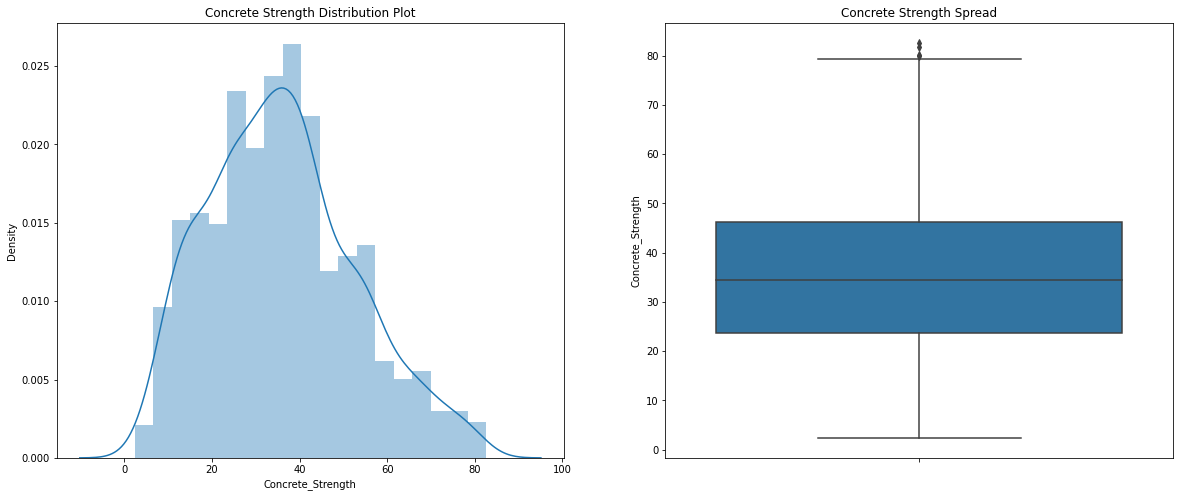

In [ ]:
# Visualizing The Data
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Concrete Strength Distribution Plot')
sns.distplot(df.Concrete_Strength)

plt.subplot(1,2,2)
plt.title('Concrete Strength Spread')
sns.boxplot(y=df.Concrete_Strength)

plt.show()

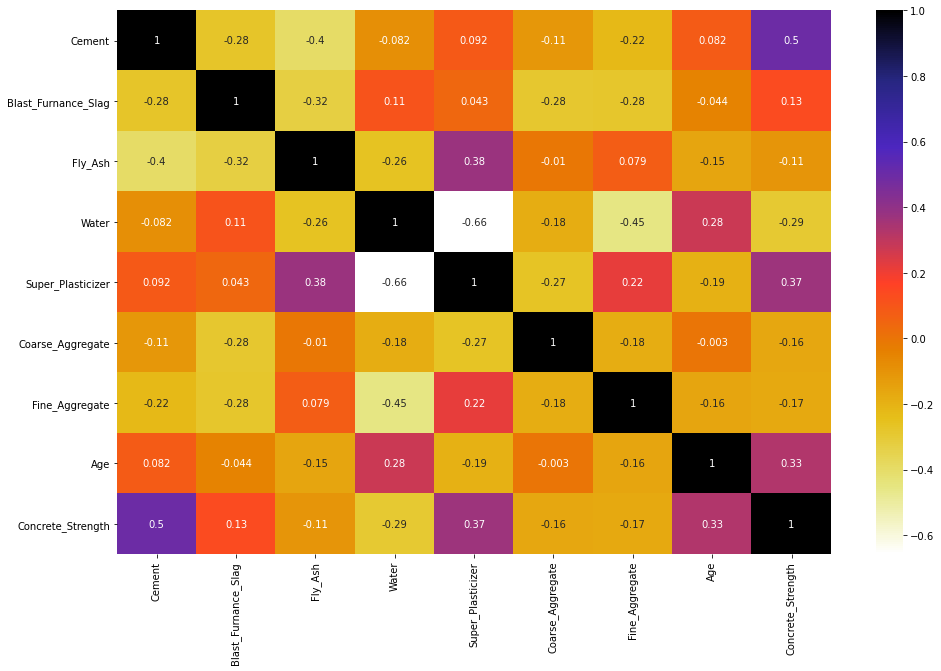

In [ ]:
# Making A HeatMap of Correlations
correlations = df.corr()
plt.figure(figsize=(16,10))
sns.heatmap(correlations, cmap="CMRmap_r", annot = True)
plt.show()

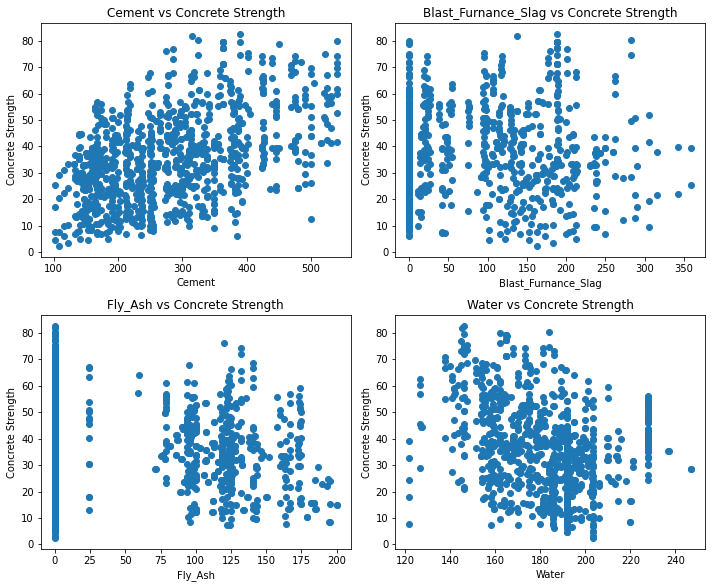

In [ ]:
# Plotting Some Important Numerical Features
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df[x],df['Concrete_Strength'])
    plt.title(x+' vs Concrete Strength')
    plt.ylabel('Concrete Strength')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('Cement', 1)
scatter('Blast_Furnance_Slag', 2)
scatter('Fly_Ash', 3)
scatter('Water', 4)

plt.tight_layout()

In [ ]:
# Shuffling Data
df = df.sample(frac=1)

In [ ]:
df.shape

(1030, 9)

In [ ]:
# Splitting The Dataset Into Testing and Training Data
train_data = df.iloc[:721,:]
train_data.head()

,Cement,Blast_Furnance_Slag,Fly_Ash,Water,Super_Plasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
train_data.shape

(721, 9)

In [ ]:
test_data = df.iloc[721:,:]
test_data.head()

,Cement,Blast_Furnance_Slag,Fly_Ash,Water,Super_Plasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_Strength
721,310.0,0.0,0.0,192.0,0.0,1012.0,830.0,3,11.85
722,310.0,0.0,0.0,192.0,0.0,1012.0,830.0,7,17.24
723,310.0,0.0,0.0,192.0,0.0,1012.0,830.0,28,27.83
724,310.0,0.0,0.0,192.0,0.0,1012.0,830.0,90,35.76
725,310.0,0.0,0.0,192.0,0.0,1012.0,830.0,120,38.70


In [ ]:
test_data.shape

(309, 9)

In [ ]:
# Separating Features From Test And Train Data
copy_of_train_data = train_data.copy()
copy_of_test_data = test_data.copy()
train_labels = train_data.pop('Concrete_Strength')
test_labels = test_data.pop('Concrete_Strength')

In [ ]:
train_labels.head()

613    11.36
56     41.93
960    40.93
436    33.69
860    38.46
Name: Concrete_Strength, dtype: float64

In [ ]:
test_labels.head()

1008    35.31
758     22.53
717      4.83
264     19.52
119     61.80
Name: Concrete_Strength, dtype: float64

In [ ]:
# Normalizing The Data

# Finding Mean
train_mean = np.mean(train_data, axis = 0)
# Finding Standard Deviation
train_std = np.std(train_data, axis = 0)
# Formula Used: Data - Mean / Satandard Deviation
train_data = (train_data - train_mean) / train_std
test_data = (test_data - train_mean) / train_std

In [ ]:
# Checking Normalized Train Data
train_data.head()

,Cement,Blast_Furnance_Slag,Fly_Ash,Water,Super_Plasticizer,Coarse_Aggregate,Fine_Aggregate,Age
613,-0.071329,-0.851982,-0.838906,0.435865,-1.038953,-0.064677,1.046387,-0.653200
56,1.798653,-0.851982,-0.838906,2.124715,-1.038953,-0.522406,-2.218109,4.858988
960,-0.005219,0.535767,-0.838906,-0.600268,0.154544,-0.034162,0.276365,-0.272524
436,-1.059209,-0.694309,1.840232,-1.125181,-0.359323,0.422295,1.051371,-0.272524
860,0.278112,-0.851982,0.917141,-0.522672,0.618682,-0.611408,0.136814,-0.272524


In [ ]:
# Checking Normalized Test Data
test_data.head()

,Cement,Blast_Furnance_Slag,Fly_Ash,Water,Super_Plasticizer,Coarse_Aggregate,Fine_Aggregate,Age
1008,-1.174430,1.327607,1.436185,0.992729,0.834174,-1.835831,-0.776498,-0.272524
758,0.618109,-0.851982,-0.838906,0.983600,-1.038953,0.011611,0.037134,-0.485702
717,-1.352928,1.605852,-0.838906,1.006422,-1.038953,-0.016362,-0.293053,-0.653200
264,-0.685212,-0.851982,1.100516,-1.024762,0.254002,1.428025,0.342402,-0.653200
119,1.326435,0.380413,-0.838906,-1.371661,2.044247,-0.471547,0.394734,-0.272524


In [ ]:
# Making Base Model

model = tf.keras.models.Sequential()
model.add(Dense(10, activation = 'relu', input_shape=[len(train_data.keys())]))
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation = 'sigmoid'))
model.add(Dense(1,))
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse', 'mae'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 7         
Total params: 239
Trainable params: 239
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Training Model on Train Data
history = model.fit(train_data, train_labels, epochs=100, verbose = 0, validation_split= 0.2)

In [ ]:
# Feeding History In DataFrame 
history_df = pd.DataFrame(history.history)
history_df['epochs'] = history.epoch
history_df.tail()

,loss,mse,mae,val_loss,val_mse,val_mae,epochs
95,1048.937988,1048.937988,27.751045,243.461792,243.461792,12.254246,95
96,1042.048828,1042.048828,27.639227,240.998413,240.998413,12.197830,96
97,1035.320190,1035.320190,27.526518,238.618805,238.618805,12.143532,97
98,1028.501465,1028.501465,27.414019,236.222626,236.222626,12.090347,98
99,1021.727966,1021.727966,27.304106,233.872498,233.872498,12.037830,99


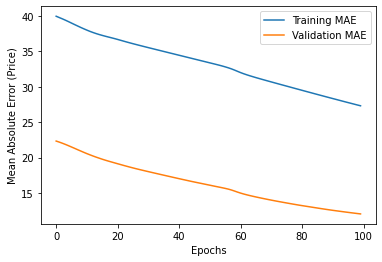

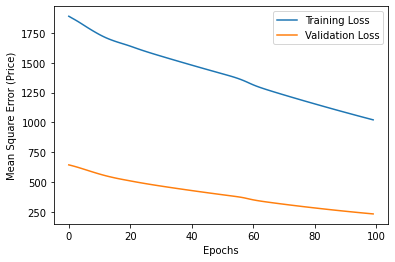

In [ ]:
# plotting loss on validation data
# Plotting Loss
def history_plot(history):
  # For Mean Absolute Error
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Mean Absolute Error (Price)')
  plt.plot(history_df['epochs'], history_df['mae'], label = 'Training MAE')
  plt.plot(history_df['epochs'], history_df['val_mae'], label = 'Validation MAE')
  plt.legend()
  # For Mean Squared Error
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Mean Square Error (Price)')
  plt.plot(history_df['epochs'], history_df['loss'], label = 'Training Loss')
  plt.plot(history_df['epochs'], history_df['val_mse'], label = 'Validation Loss')
  plt.legend()

history_plot(history_df)


In [ ]:
# Making Predictions on Test Data
predictions = model.predict(test_data).flatten()
predictions = predictions.flatten()

In [ ]:
test_score = model.evaluate(test_data, test_labels)

10/10 [==============================] - 0s 2ms/step - loss: 525.0441 - mse: 525.0441 - mae: 18.9385


In [ ]:
print(f"Mean Squared Error: {test_score[0]}")
print(f"Mean Absolute Error: {test_score[2]}")

Mean Squared Error: 525.0440673828125
Mean Absolute Error: 18.938472747802734


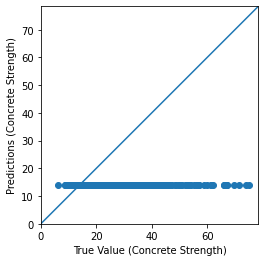

In [ ]:

# Making Price Predictions On Test Data

plt.scatter(test_labels, predictions)
plt.xlabel('True Value (Concrete Strength)')
plt.ylabel('Predictions (Concrete Strength)')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.xlim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

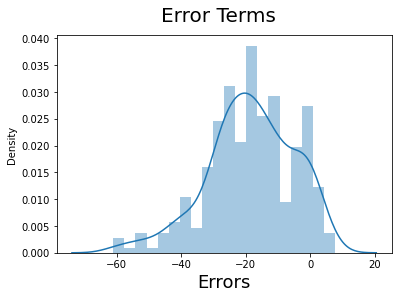

In [ ]:
# Plotting Difference Between Actual Values And Predicted Values

fig = plt.figure()
sns.distplot((predictions - test_labels), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18)

**Making Second Model For Validation Data**

In [ ]:
#Making Second Model For Validation Data
from tensorflow.keras.models import Sequential
model2 = Sequential()
model2.add(Dense(64, activation = 'relu', input_shape = [len(train_data.keys())]))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(64, activation = 'sigmoid'))
model2.add(Dense(1))
optimizer = tf.keras.optimizers.RMSprop(0.001)
model2.compile(optimizer=optimizer, loss='mse', metrics=['mse','mae'])
model2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 64)                576       
_________________________________________________________________
dense_38 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_39 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_40 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_41 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 65        
Total params: 17,281
Trainable params: 17,281
Non-trainable params: 0
__________________________________________________

In [ ]:
history_1 = model2.fit(train_data, train_labels, epochs=500, verbose = 0, validation_split=0.2)

In [ ]:
# Feeding history_1 In DataFrame
history_1_df = pd.DataFrame(history_1.history)
history_1_df['epochs'] = history_1.epoch
history_1_df.tail()

,loss,mse,mae,val_loss,val_mse,val_mae,epochs
495,6.671946,6.671946,1.577744,55.791370,55.791370,5.606947,495
496,7.209937,7.209937,1.683243,49.733356,49.733356,5.373225,496
497,7.745718,7.745718,1.693748,54.512730,54.512730,5.501247,497
498,7.517196,7.517196,1.736582,58.176144,58.176144,5.678499,498
499,6.403423,6.403423,1.494584,49.756771,49.756771,5.230345,499


In [ ]:
predictions1 = model2.predict(test_data)
predictions1 = predictions1.flatten()

In [ ]:
test1_score = model2.evaluate(test_data, test_labels)

10/10 [==============================] - 0s 2ms/step - loss: 199.3714 - mse: 199.3714 - mae: 10.6776


In [ ]:
print(f"Loss: {test1_score[0]}")
print(f"Mean Absolute Error: {test1_score[2]}")

Loss: 199.37142944335938
Mean Absolute Error: 10.677610397338867


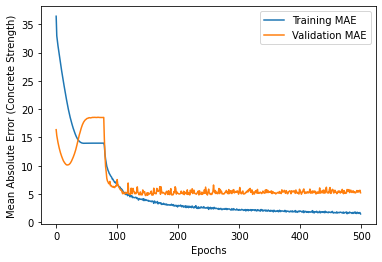

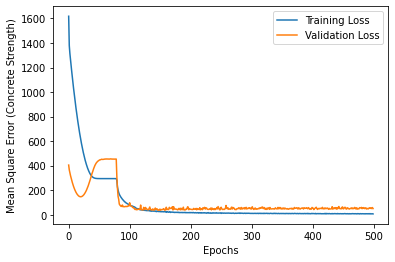

In [ ]:

# Plotting Loss
def history_plot(history):
  # For Mean Absolute Error
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Mean Absolute Error (Concrete Strength)')
  plt.plot(history_1_df['epochs'], history_1_df['mae'], label = 'Training MAE')
  plt.plot(history_1_df['epochs'], history_1_df['val_mae'], label = 'Validation MAE')
  plt.legend()
  # For Mean Squared Error
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Mean Square Error (Concrete Strength)')
  plt.plot(history_1_df['epochs'], history_1_df['loss'], label = 'Training Loss')
  plt.plot(history_1_df['epochs'], history_1_df['val_mse'], label = 'Validation Loss')
  plt.legend()

history_plot(history_1_df)

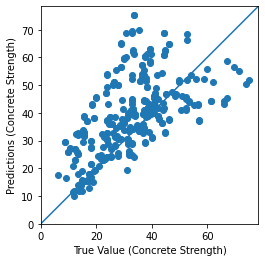

In [ ]:
plt.scatter(test_labels, predictions1)
plt.xlabel('True Value (Concrete Strength)')
plt.ylabel('Predictions (Concrete Strength)')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.xlim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

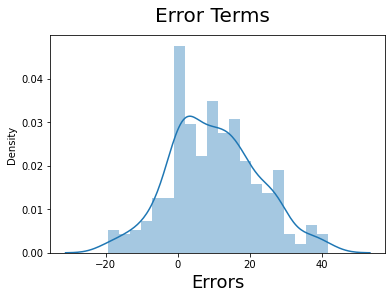

In [ ]:
# Plotting Difference Between Actual Values And Predicted Values
fig = plt.figure()
sns.distplot((predictions1 - test_labels), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

Buliding Third Model For Overcoming Overfitting

In [ ]:
# Overcoming Overfitting 
from tensorflow.keras.callbacks import EarlyStopping
overcome = EarlyStopping(monitor = 'val_loss', patience = 10)

In [ ]:
# Building Third Model

from tensorflow.keras.models import Sequential
model3 = Sequential()
model3.add(Dense(64, activation = 'relu', input_shape = [len(train_data.keys())]))
model3.add(Dense(64, activation = 'relu'))
model3.add(Dense(64, activation = 'sigmoid'))
model3.add(Dense(1,))
optimizer = tf.keras.optimizers.RMSprop(0.001)
model3.compile(optimizer=optimizer, loss='mse', metrics=['mse','mae'])
model3.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 64)                576       
_________________________________________________________________
dense_48 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_49 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 65        
Total params: 8,961
Trainable params: 8,961
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_2 = model3.fit(train_data, train_labels, epochs=100, verbose = 0, validation_split = 0.2)

In [ ]:
history_2_df = pd.DataFrame(history_2.history)
history_2_df['epochs'] = history_2.epoch
history_2_df.tail()

,loss,mse,mae,val_loss,val_mse,val_mae,epochs
95,37.709961,37.709961,4.648281,53.388603,53.388603,5.767447,95
96,36.227455,36.227455,4.559021,38.526352,38.526352,4.907836,96
97,37.351971,37.351971,4.651510,35.891872,35.891872,4.746614,97
98,37.742649,37.742649,4.585951,37.942207,37.942207,4.836812,98
99,35.993042,35.993042,4.575034,42.142437,42.142437,5.021122,99


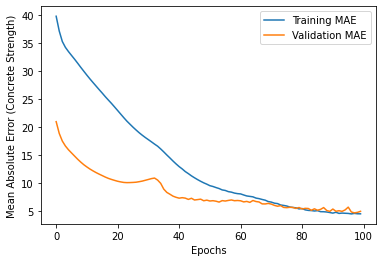

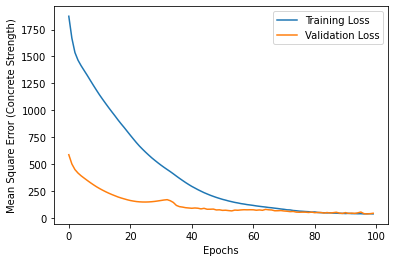

In [ ]:
# Plotting Validation Loss After Overcoming Overfitting
# Plotting Loss
def history_plot(history):
  # For Mean Absolute Error
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Mean Absolute Error (Concrete Strength)')
  plt.plot(history_2_df['epochs'], history_2_df['mae'], label = 'Training MAE')
  plt.plot(history_2_df['epochs'], history_2_df['val_mae'], label = 'Validation MAE')
  plt.legend()
  # For Mean Squared Error
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Mean Square Error (Concrete Strength)')
  plt.plot(history_2_df['epochs'], history_2_df['loss'], label = 'Training Loss')
  plt.plot(history_2_df['epochs'], history_2_df['val_mse'], label = 'Validation Loss')
  plt.legend()

history_plot(history_2_df)

In [ ]:
predictions3 = model3.predict(test_data)
predictions3 = predictions3.flatten()

In [ ]:
print(predictions3.shape)
print(test_labels.shape)

(309,)
(309,)


In [ ]:
test2_score  = model3.evaluate(test_data, test_labels)

10/10 [==============================] - 0s 2ms/step - loss: 136.8724 - mse: 136.8724 - mae: 9.1767


In [ ]:
print(f"Loss: {test2_score[0]}")
print(f"Mean Absolute Error: {test2_score[2]}")

Loss: 32.79438018798828
Mean Absolute Error: 4.061126708984375


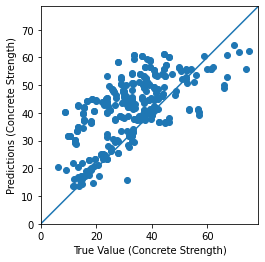

In [ ]:
plt.scatter(test_labels, predictions3)
plt.xlabel('True Value (Concrete Strength)')
plt.ylabel('Predictions (Concrete Strength)')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.xlim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

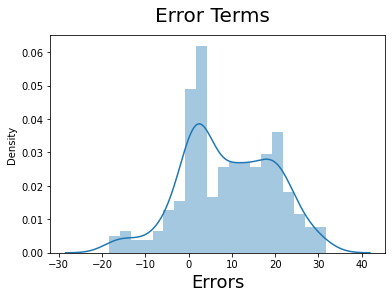

In [ ]:
# Plotting Difference Between Actual Values And Predicted Values
fig = plt.figure()
sns.distplot((predictions3 - test_labels), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

Final Loss: 32.794 <br>
Final Mean Absolute Error: 4.061

In [ ]:
# Saving Appropriate Model
model3.save('ConcreteStrengthModel.h5')

In [ ]:
# Saving Model In CSV File
from google.colab import files
df.to_csv('Concrete_Strength_Assignment.csv', index=False)
files.download('Concrete_Strength_Assignment.csv')
print("Your File Was Saved Successfully!")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Your File Was Saved Successfully!
